In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

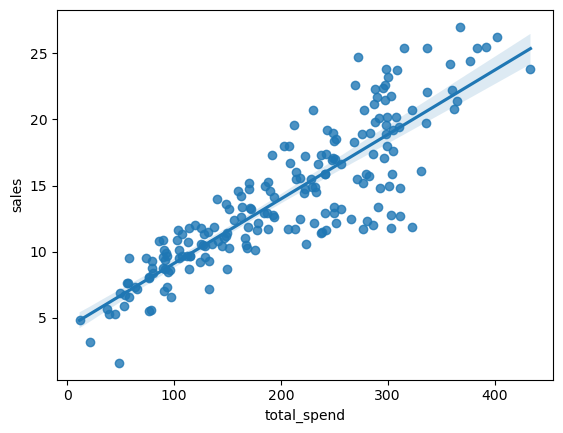

In [5]:
sns.regplot(x='total_spend', y='sales', data=df)

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
# y = mx + b 
# y = B1*x + B0
# help(np.polyfit)
# first b1, then b0

In [8]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0, 500, 100)

In [10]:
500 * 0.048 + 4.25

28.25

In [11]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

<Axes: xlabel='total_spend', ylabel='sales'>

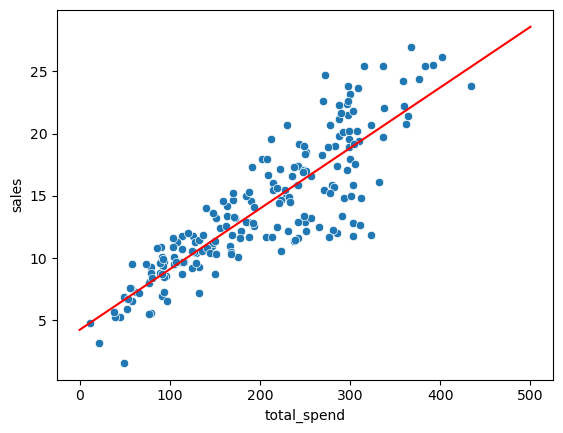

In [64]:
plt.plot(potential_spend, predicted_sales, color='red')
sns.scatterplot(x='total_spend',y='sales', data=df)

In [13]:
spend = 200
predicted_sale = 0.04868788 * spend + 4.24302822

In [14]:
predicted_sale

13.98060422

In [15]:
np.polyfit(X, y, 3)
# four numbers == x^3, x^2, x, const
# y = B3*x^3 + B2*x^2 + B*x + B0

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0, 500, 100)

In [17]:
pot_sales = 3.07615033e-07 * pot_spend**3 + \
           -1.89392449e-04 * pot_spend**2 + \
            8.20886302e-02 * pot_spend    + \
            2.70495053e+00

<Axes: xlabel='total_spend', ylabel='sales'>

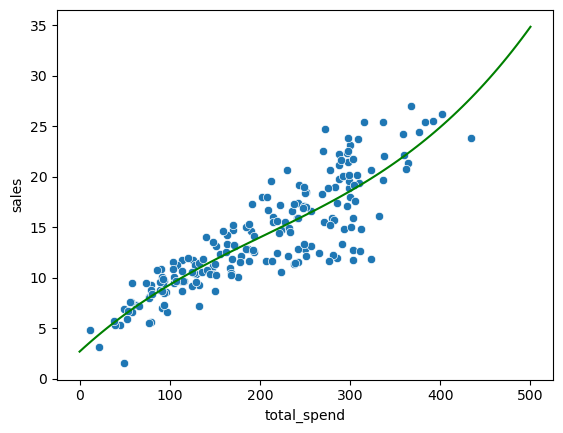

In [18]:
plt.plot(pot_spend, pot_sales, color='green')
sns.scatterplot(x='total_spend', y='sales', data=df)

Text(0.5, 0, 'Sales')

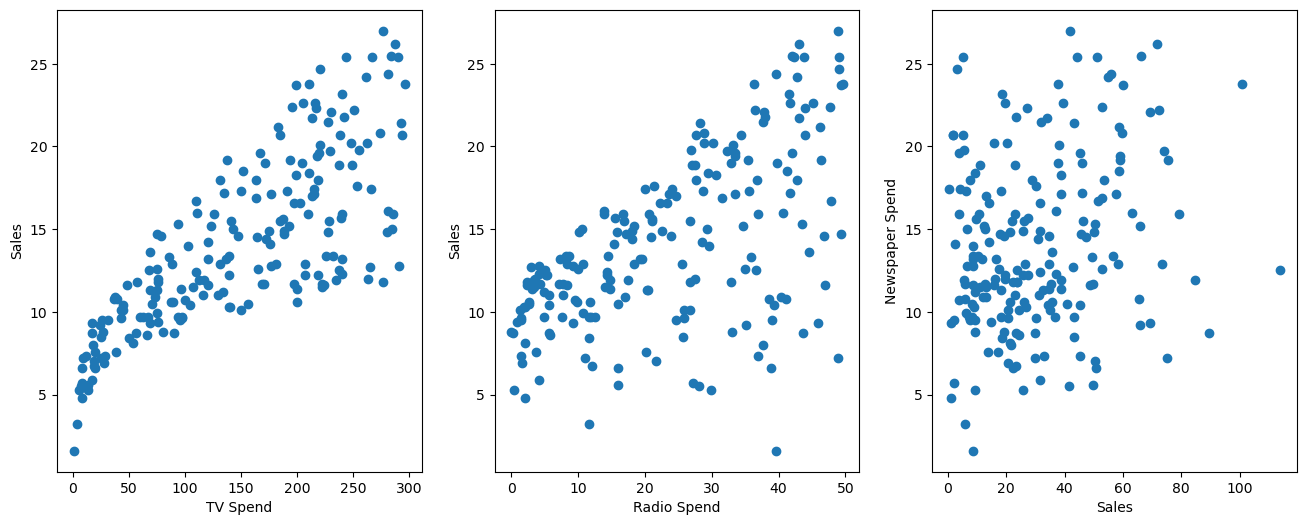

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Newspaper Spend')
axes[2].set_xlabel('Sales')

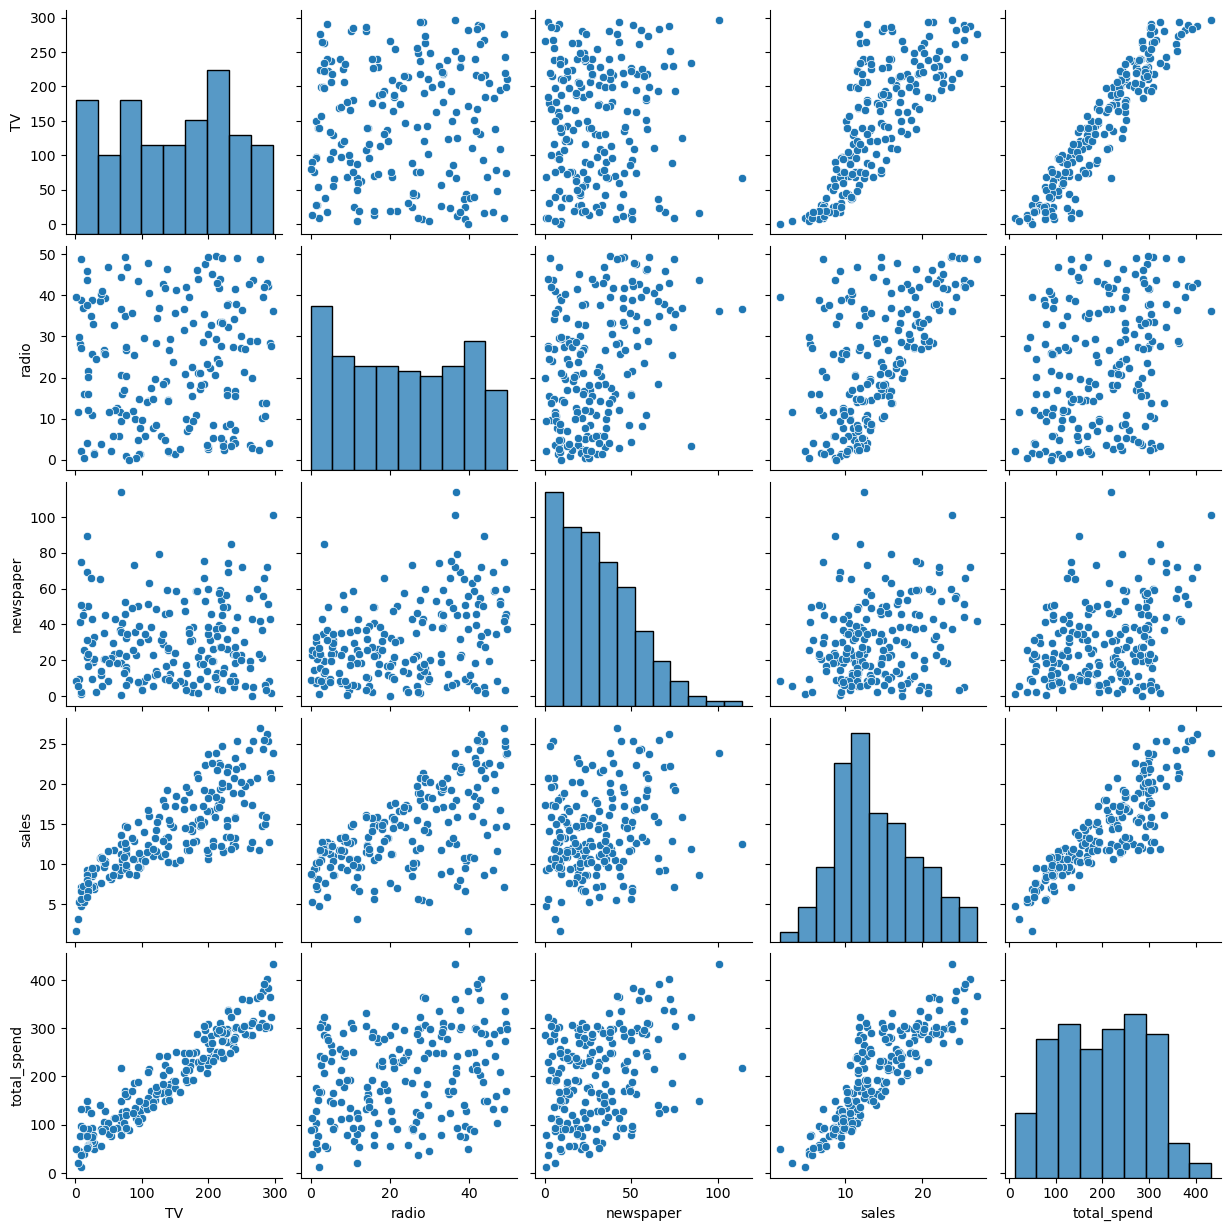

In [20]:
sns.pairplot(df)

In [21]:
X = df.drop(['sales', 'total_spend'], axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y = df['sales']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_test_split # shift + tab or help(train_test_split)

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
len(df)

200

In [27]:
len(X_test)

60

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
test_predictions = model.predict(X_test)

In [32]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [33]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

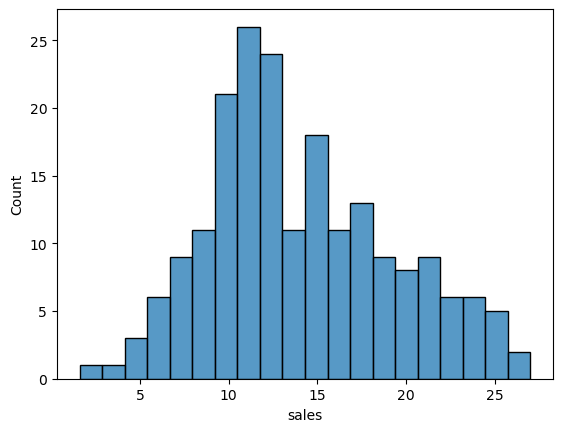

In [36]:
sns.histplot(data=df, x='sales', bins=20)

In [37]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144803

In [38]:
mean_squared_error(y_test, test_predictions)

2.2987166978863782

In [39]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

In [40]:
test_residuals = y_test - test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

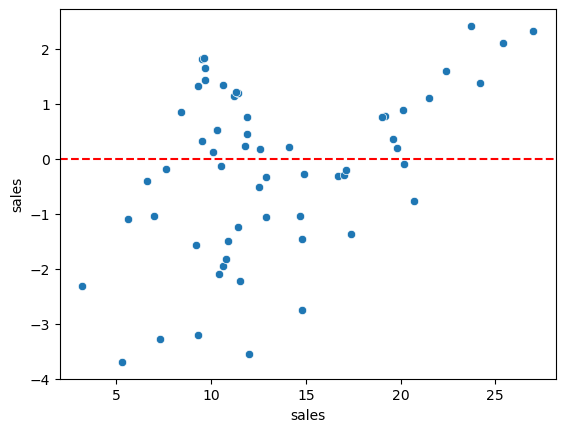

In [41]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

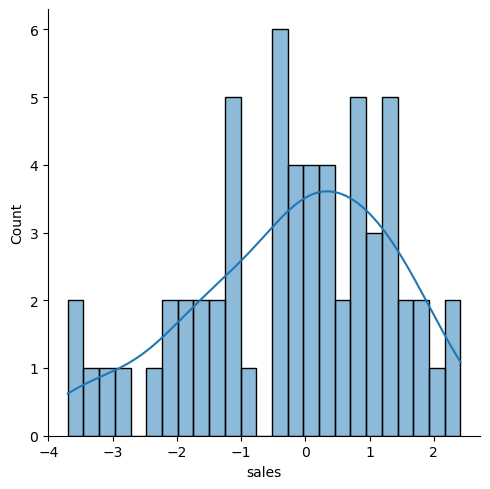

In [42]:
sns.displot(test_residuals, bins=25, kde=True)

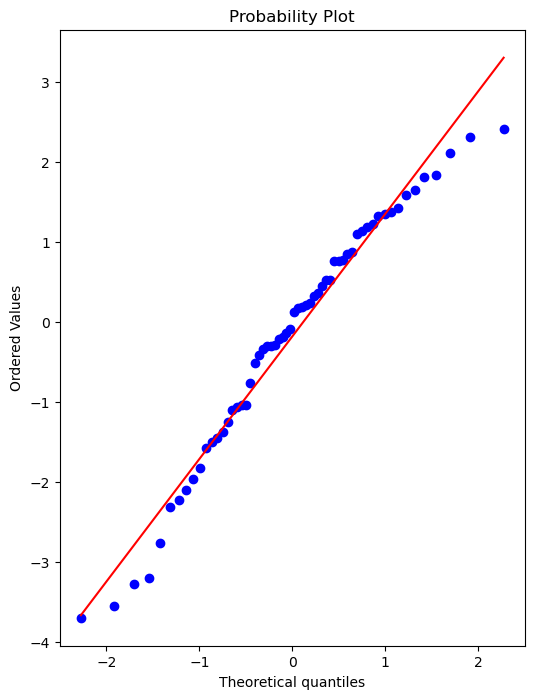

In [43]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,8), dpi=100)

_ = sp.stats.probplot(test_residuals, plot=ax)

In [44]:
final_model = LinearRegression()

In [45]:
final_model.fit(X, y)

LinearRegression()

In [46]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [47]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [48]:
y_hat = final_model.predict(X)

Text(0.5, 0, 'Sales')

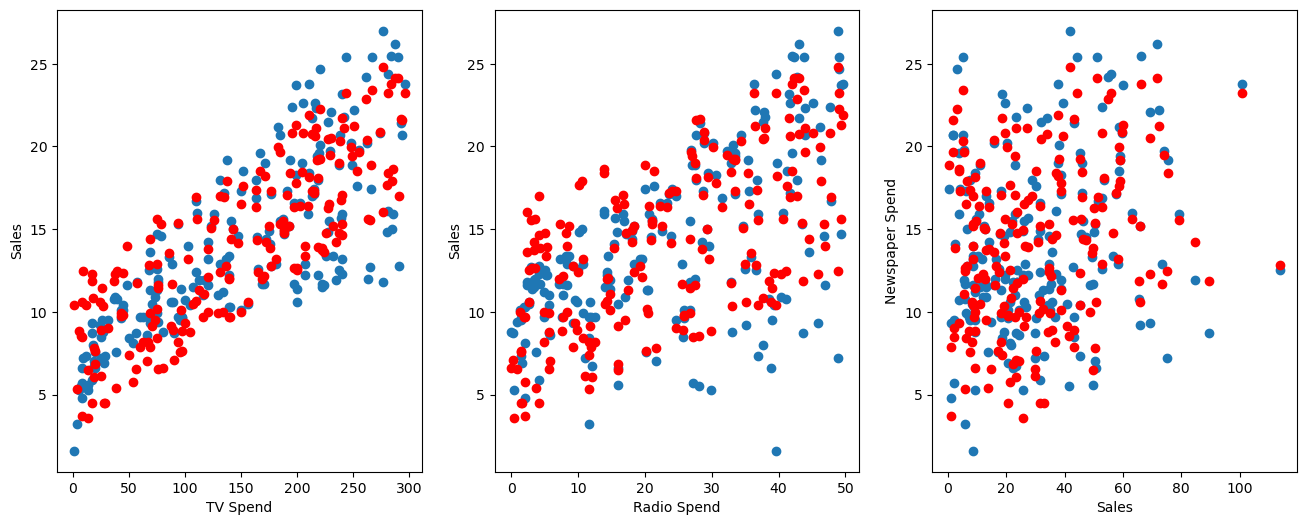

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel('Newspaper Spend')
axes[2].set_xlabel('Sales')

In [53]:
from joblib import dump, load

In [54]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [55]:
loaded_model = load('final_sales_model.joblib')

In [56]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [57]:
X.shape

(200, 3)

In [59]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?

campaign = [[149, 22, 12]]

In [60]:
loaded_model.predict(campaign)

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])